# Case Study - Condo Market in Singapore

## Learning Objectives:
- Become familiar with different visualization techniques  
- Understand the confounding effect and the way to control for it
- Explore possible relationships among multiple variables 

<i><b>Background</b></i>: Buying a condo might be a dream for some Singaporeans. Depending on the location and area of the property, the corresponding price differs substantially. For those who want to buy condos for residing or for investments, a deeper understanding of Singapore’s real estate market is crucial. The file `condo.csv` contains the prices of condos in Singapore for the past several years. Moreover, some attributes of such condos are also included in the file.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("condo.csv") 
df.head(10)

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19
5,MOUNT FABER LODGE,4400000,1188,4,RCR,Resale,3703,06 to 10,999.0,Oct-19
6,BLUE HORIZON,990000,1022,5,OCR,Resale,969,21 to 25,80.0,Oct-19
7,DOVER PARKVIEW,1088000,1162,5,RCR,Resale,936,06 to 10,73.0,Oct-19
8,CARIBBEAN AT KEPPEL BAY,1470000,1751,4,RCR,Resale,840,06 to 10,79.0,Oct-19
9,THE INTERLACE,4550000,868,4,RCR,Resale,5242,16 to 20,89.0,Oct-19


In [2]:
df.shape
df.describe()
df.index
df.columns

Index(['name', 'price', 'unit_price', 'district_code', 'segment', 'type',
       'area', 'level', 'remaining_years', 'date'],
      dtype='object')

## Task 1: Explore the relationship between the condo price and the condo type

For a Singaporean who wants to invest in the real estate market, would you suggest him or her to buy resale condos or newly built condos? Please analyze the historical data in the file `condo.csv` to arrive at your conclusion. Specifically, you need to explore the relationship between the condo price and the type of the condo (resale versus new). <b>Note</b>: if you want to draw histograms to explore the distribution of the condo price, please set bins as `np.arange(0.5e6, 5e6, 0.1e6)`. 

In [3]:
df_typeprice_filter_resale = df[df["type"] == "Resale"]
df_typeprice_filter_new = df[df["type"] == "New Sale"]


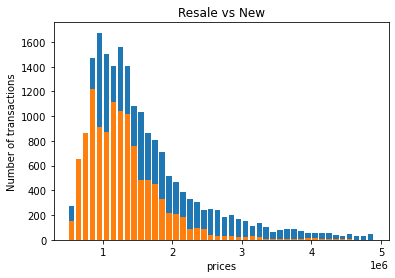

In [4]:
bins = np.arange(0.5e6, 5e6, 0.1e6) # range
plt.hist(df_typeprice_filter_resale["price"], bins, histtype= 'barstacked', rwidth=0.8)
plt.hist(df_typeprice_filter_new["price"], bins, histtype= 'barstacked', rwidth=0.8)
plt.xlabel('prices')
plt.ylabel('Number of transactions')
plt.title('Resale vs New')
plt.show()

This is a counter-intuitive finding that resale condos are more expensive than the new condos on average. Can you think about a possible reason for this? 

In [5]:
df_typeprice_grp = df.groupby(["type"]).agg(
         trans_count=pd.NamedAgg(column='type', aggfunc='count'),
         price_median=pd.NamedAgg(column='price', aggfunc=np.median),
         price_min=pd.NamedAgg(column='price', aggfunc=np.min),
         price_max=pd.NamedAgg(column='price', aggfunc=np.max),
        price_sd=pd.NamedAgg(column='price', aggfunc='std'),
        area_median=pd.NamedAgg(column='price', aggfunc=np.median),
        ).reset_index()

print(df_typeprice_grp["price_max"])
df_typeprice_grp

0    18883200
1    52000000
Name: price_max, dtype: int64


,type,trans_count,price_median,price_min,price_max,price_sd,area_median
0,New Sale,11645,1202000,546000,18883200,6.764492e+05,1202000
1,Resale,20523,1375000,488000,52000000,1.692404e+06,1375000


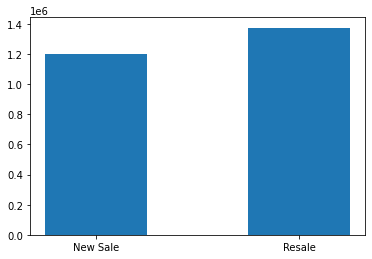

In [6]:
plt.bar(df_typeprice_grp['type'],df_typeprice_grp['area_median'] + 1,width=.5)

plt.show()

In [7]:
df_type_district_price_grp = df.groupby(["type","segment"]).agg(
         trans_count=pd.NamedAgg(column='type', aggfunc='count'),
         price_median=pd.NamedAgg(column='price', aggfunc=np.median),
         price_min=pd.NamedAgg(column='price', aggfunc=np.min),
         price_max=pd.NamedAgg(column='price', aggfunc=np.max),
        ).reset_index()
df_type_district_price_grp

,type,segment,trans_count,price_median,price_min,price_max
0,New Sale,CCR,886,1979750,1028067,9134800
1,New Sale,OCR,5825,1008000,546000,4881708
2,New Sale,RCR,4934,1337400,607572,18883200
3,Resale,CCR,4221,2665000,560088,52000000
4,Resale,OCR,10827,1100000,488000,4200000
5,Resale,RCR,5475,1650000,570000,19000000


## Task 2: Explore the relationship between the condo area and the condo type


Now let’s focus on another attribute of a condo in the data set, the area of a condo. Please explore the distribution of the area of a condo by the condo type. Please draw a visualization to present your findings? If you want to draw histograms to explore the distribution of the area of a condo, please set the bins as `np.arange(0.5e3, 10e3, 0.1e3)`.

In [8]:
df_resale_area= df_typeprice_filter_resale["area"]
print(df_resale_area.describe())
df_new_area= df_typeprice_filter_new["area"]
df_new_area.describe()

count    20523.000000
mean      1345.806607
std        678.821591
min        355.000000
25%        969.000000
50%       1227.000000
75%       1507.000000
max      11098.000000
Name: area, dtype: float64


count    11645.000000
mean       862.379219
std        336.641076
min        409.000000
25%        624.000000
50%        807.000000
75%       1033.000000
max       7868.000000
Name: area, dtype: float64

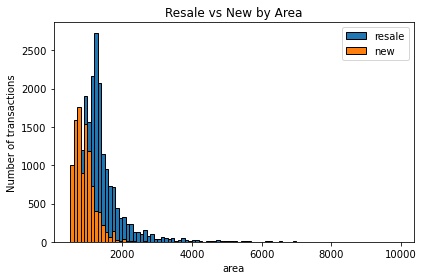

In [9]:
bins = np.arange(0.5e3, 10e3, 0.1e3) # range
plt.hist (df_typeprice_filter_resale["area"], bins, histtype= 'bar', edgecolor = "black",rwidth=1.8,label="resale")
plt.hist( df_typeprice_filter_new["area"], bins, histtype= 'bar',edgecolor = "black", rwidth=1.8,label="new")
plt.xlabel('area')
plt.ylabel('Number of transactions')
plt.title('Resale vs New by Area')
plt.legend()
plt.tight_layout()
plt.show()

## Task 3: Explore the relationship between the condo area and the condo price


Moreover, please explore the relationship between the area of a condo and its price. You can draw a scatter plot to uncover the possible pattern between the two variables.

In [10]:
print(df_typeprice_filter_resale["price"].describe())
print(df_typeprice_filter_resale["area"].describe())

count    2.052300e+04
mean     1.823054e+06
std      1.692404e+06
min      4.880000e+05
25%      1.028570e+06
50%      1.375000e+06
75%      1.950000e+06
max      5.200000e+07
Name: price, dtype: float64
count    20523.000000
mean      1345.806607
std        678.821591
min        355.000000
25%        969.000000
50%       1227.000000
75%       1507.000000
max      11098.000000
Name: area, dtype: float64


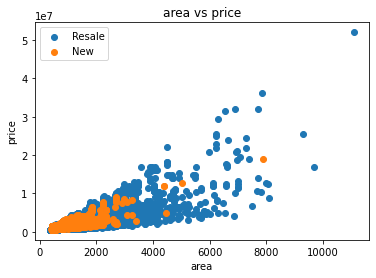

In [11]:
# You can also use plt.scatter() directly to draw a scatter plot 

plt.scatter(df_typeprice_filter_resale["area"],df_typeprice_filter_resale["price"],label="Resale")
plt.scatter(df_typeprice_filter_new["area"],df_typeprice_filter_new["price"],label="New")
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.title('area vs price')
plt.show()

From Tasks 1-3, now you should know the relationship found between the condo price and the condo type is not trustworthy. There is a third variable that is related to both the condo price and the condo type. In the above analysis, this third variable is the area of the condo. We call this third variable as the <i>confounder</i> or <i>confounding variable</i>. 

## Task 4: Grouping

Now let’s explore the ways of controlling for the confounding effect of the area of a condo in the analysis. A useful method is to do a stratified analysis. Since the confounder variable, the area of a condo, is continuous, to simplify the discussion, a discretization is carried out. Please form a new variable in the data set by grouping the condos into 3 different categories in terms of their areas. The three categories are defined as follows:
1.	Small: the area of a condo less than 800 square feet
2.	Median: the area of a condo between 800 and 1200 square feet 
3.	Large: the area of a condo larger than 1200 square feet

In [12]:
#using numpy
df["area_category"] = np.where(df["area"] < 800 ,"small","")
df
df["area_category"] = np.where(df["area"] > 1200 ,"large",df["area_category"])
df
df["area_category"] = np.where((df["area"] > 800) & (df["area"] < 1200),"median",df["area_category"])
df.sort_values("area_category",ascending=False)
df["area_category"].value_counts()

large     12653
median    11186
small      8329
Name: area_category, dtype: int64

In [13]:
df_area_grp = df.groupby("area_category")["area"].count().reset_index()
type(df_area_grp)
df_area_grp

,area_category,area
0,large,12653
1,median,11186
2,small,8329


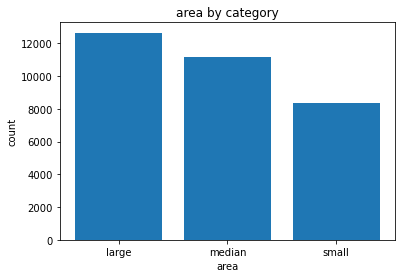

In [14]:
plt.bar(df_area_grp["area_category"],df_area_grp["area"])
plt.xlabel("area")
plt.ylabel("count")
plt.title("area by category")
plt.show()

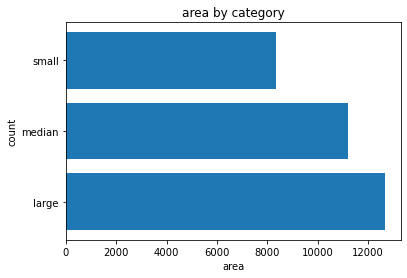

In [15]:
plt.barh(df_area_grp["area_category"],df_area_grp["area"])
plt.xlabel("area")
plt.ylabel("count")
plt.title("area by category")
plt.show()

In [16]:
#using def

#def label_area_category (row):
#   if(df["area"] < 800):
#        return "small"
#    elif(df["area"] > 1200):
#        return "large"
#    elif((df["area"] > 800) & (df["area"] < 1200)):
#        return "median"
#    else:
#        return ""
#df["area_category"] = df.apply (lambda row: label_area_category1(row), axis=1)


## Task 5: The relationship between the condo price and the condo type, controlling for the condo area 


With the new categorical variable and the condo type, 6 possible combinations of the two variables can be generated to represent a condo’s profile. For example, we can define a condo's profile as small and resale. Now please explore the relationship between the condo price and condo type by 3 different categories of the condo area. What is your conclusion? 

area_category      type  large  median  small
0              New Sale   1472    4356   5817
1                Resale  11181    6830   2512


Text(0, 0.5, 'No Of condos')

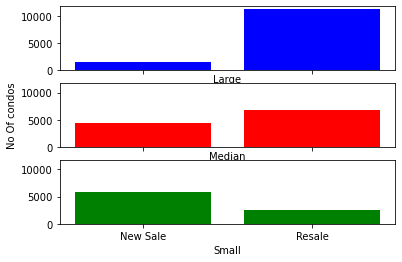

In [43]:
df_grp_cat_type = df.groupby(["type","area_category"])["area"].count().unstack() # pivot alternative
df_grp_cat_type
df_n = df_grp_cat_type.reset_index(drop=False)
print(df_n)

fig,ax = plt.subplots(3,1,sharey=True,sharex=True) # sharey
ax[0].bar(df_n["type"],df_n["large"],color='b')
ax[1].bar(df_n["type"],df_n["median"],color='r')
ax[2].bar(df_n["type"],df_n["small"],color='g')


ax[0].set_xlabel("Large")
ax[1].set_xlabel("Median")
ax[2].set_xlabel("Small")
ax[1].set_ylabel("No Of condos")

